Я запустил алгоритм на случайных тестах, размера начиная с 2 и он обсчитывает по 10 тестов одного размера.
Я хочу попробовать проанализировать данные, которые получу в результате его работы.
А именно я получаю на выход, время работы на тесте, вес цикла и сам цикл. 

In [60]:
class Node:
    def __init__(self, number, cost, time, answer): 
        self.number = int(number)
        self.cost = float(cost)
        self.time = float(time) / 10**9
        self.size = self.number / 100
        self.answer = answer
    def write(self):
        print("n = ", self.number," \n")
        print("cost = ", self.cost, " \n")
        print("time = ", self.time, " \n")
        print("size = ", self.size, "\n")
        print("answer = ", self.answer, "\n")
    def getTime(self):
        return self.time
    def getSize(self):
        return self.size
    def getNumber(self):
        return self.number
    def getAnswer(self):
        return self.answer

class Point:
    def __init__(self, x, y):
        self.x = x
        self.y = y
def constructNode(a):
    c = a.split('\n')
    number = c[0]
    answerStr = c[1].split("to")
    answer = []
    for i in range(len(answerStr)):
        answer.append(int(answerStr[i]))
    cost = (c[2].split())[1]
    time = (c[3].split())[1]
    return Node(number, cost, time, answer)

Вытащим данные из файла и преобразуем в удобный формат.

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


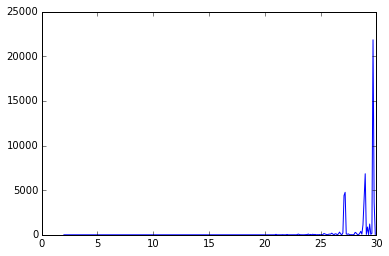

In [61]:
import math

import pylab

from matplotlib import mlab
%pylab inline
def plotPoints(a, size, showed):
    Y =  [a[i].getTime() for i in range(size)]
    X =  [a[i].getSize() for i in range(size)]
    pylab.plot (X, Y)
    if(showed):
        pylab.show()
    
def readNodes(name):
    fin = open(name, 'r')
    a = fin.read()
    nodesToSplit = a.split("i =");
    nodes = []
    for i in range(len(nodesToSplit) -1):
        nodes.append(constructNode(nodesToSplit[i+1]))
    return nodes
nodes = readNodes('out0.txt')
nodesOne = []
nodesOne.append(nodes[240])
plotPoints(nodes, len(nodes), True)

Построим график, видим, что есть три каких-то очень плохих теста, которые выглядят, как пики на этом графике. Давайте запомним, что они есть и выкиним их из эксперементальных данных.

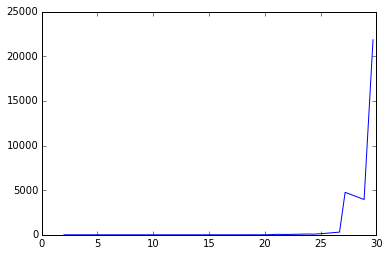

In [62]:
def findMaxTime(l, a, b):
    maxEl = l[a].getTime()
    deleteEl = 0
    for i in range(a, b):
        if(l[i].getTime() >= maxEl):
            maxEl = l[i].getTime()
            value = l[i]
            deleteEl = i
    l.pop(deleteEl)
    return value
maxTimeNodes =[]
for i in range(len(nodes) // 10 - 1, -1, -1):
    maxTimeNodes.append(findMaxTime(nodes, i*10, (i + 1) * 10))
plotPoints(maxTimeNodes, len(maxTimeNodes),True)


График из максимумов, похож на рост по экспоненте.

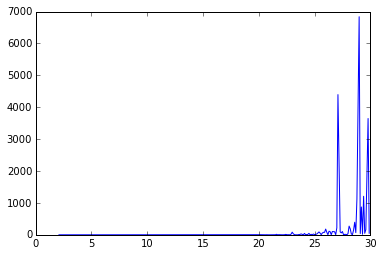

In [63]:
plotPoints(nodes, len(nodes),True)

Ну чтож попробуем выкинуть два максимума из рассмотрения. Хотя уже сейчас график выглядит намного лучше.


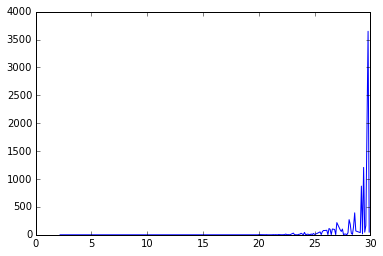

In [64]:
for i in range(len(nodes) // 9 - 1, -1, -1):
    maxTimeNodes.append(findMaxTime(nodes, i*9, (i + 1) * 9))
plotPoints(nodes, len(nodes), True)

Ну вот уже намного лучше.

посмотрим для интереса, ещё и на начало графика.

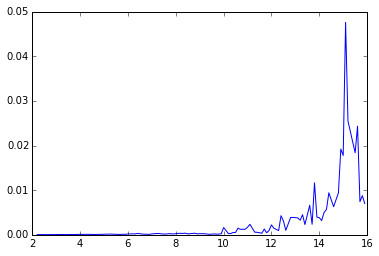

In [65]:
plotPoints(nodes, len(nodes)//2, True)

Не красивый график, давайте запустим по 100 тестов для каждого размера. По значениям находящимя в середине. 

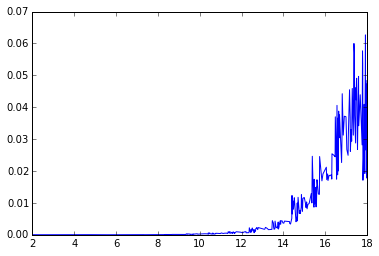

In [81]:
def findMinTime(l, a, b):
    minEl = l[a].getTime()
    deleteEl = 0
    for i in range(a, b):
        if(l[i].getTime() <= minEl):
            minEl = l[i].getTime()
            value = l[i]
            deleteEl = i
    l.pop(deleteEl)
    return value

fin = open('16100.txt', 'r')
a = fin.read()
nodesToSplitSmall = a.split("i =");
smallNodes = []
for i in range(len(nodesToSplitSmall) -1):
    smallNodes.append(constructNode(nodesToSplitSmall[i+1]))
smallMaxTime = []
for i in range(len(smallNodes) // 100 - 1, -1, -1):
    smallMaxTime.append(findMaxTime(smallNodes, i*100, (i + 1) * 100))

for j in range(35):
    for i in range(len(smallNodes)// (99 - j * 2 + 1) - 1, -1, -1):
        findMaxTime(smallNodes, i * (99 - j * 2 + 1), (i + 1) * (99 - j * 2 + 1))
        findMinTime(smallNodes, i * (99 - j * 2), (i + 1) * (99 - j * 2))                               
plotPoints(smallNodes, len(smallNodes), True)

Давайте попробуем понять, есть ли какая-то видимая разница, между тестами на которых алгоритм работает плохо и тех на которых он работает хорошо.

In [69]:
smallMinTime = []
for i in range(len(smallNodes) // 100 - 1, -1, -1):
    smallMinTime.append(findMinTime(smallNodes, i*100, (i + 1) * 100))


Нарисуем и посмотрим.

In [51]:
import numpy as np
from bokeh.plotting import *

def show(node):
    fin = open(str(node.getNumber()) + ".txt", 'r')
    a = fin.read()
    lines = a.split('\n')
    lines.pop(0)
    lines.pop(0)
    lines.pop(len(lines) - 1)
    lines.pop(len(lines) - 1)
    points = []
    X = []
    Y = []
    for i in range(len(lines)):
        c = lines[i].split(' ')
        points.append(Point(float(c[1]), float(c[2])))
    for i in range(len(node.getAnswer())):
        c = lines[node.getAnswer()[i] - 1].split(' ')
        X.append(float(c[1]))
        Y.append(float(c[2]))
    plot(X, Y)


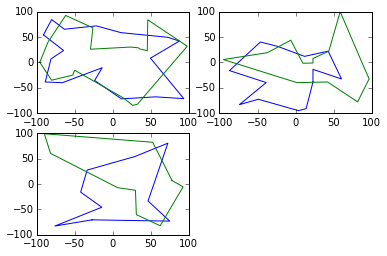

In [52]:
for i in range(0, 12, 4):
    subplot(221 + i // 4)
    p1 = show(smallMinTime[i]) #синий тест с минимальным временем работы
    p2 = show(smallMaxTime[i]) #зеленый тест с максимальным временем работы

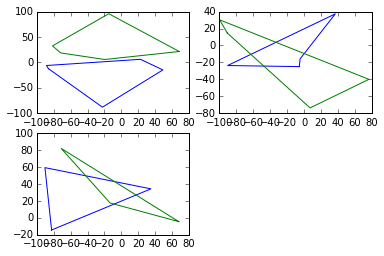

In [53]:
for i in range(12, 15):
    subplot(221 + i % 4)
    p1 = show(smallMinTime[i]) #синий
    p2 = show(smallMaxTime[i]) #зеленый

Сомневаюсь, что здесь можно найти закономерность. Это и понятно в этом алгоритме многое зависит от того в каком порядке заданы вершины, от этого зависит, то на сколько быстро мы найдем действительно хороший путь, который позволит перебирать нам меньшее количество вершин. 

До этого момента, старался найти честное полное решение задачи, и иногда это получалось сделать за малое время, но видно что например на тесте 2980 алгоритм работал почти то же время, что динамика за $2^n * n^2$.
Давайте теперь построим несколько графиков, времени работы алгоритма, в зависимости от точности, которая нам требуется. 

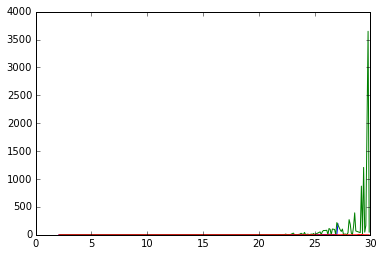

In [54]:
nodes0 = nodes
nodes010 = readNodes("out10.txt")
for i in range(len(nodes010) // 10 - 1, -1, -1):
    findMaxTime(nodes010, i*10, (i + 1) * 10)
for i in range(len(nodes010) // 9 - 1, -1, -1):
    findMaxTime(nodes010, i*9, (i + 1) * 9)
nodes025 = readNodes("out25.txt")
for i in range(len(nodes025) // 10 - 1, -1, -1):
    findMaxTime(nodes025, i*10, (i + 1) * 10)
for i in range(len(nodes025) // 9 - 1, -1, -1):
    findMaxTime(nodes025, i*9, (i + 1) * 9)
plotPoints(nodes010, len(nodes010), False)  # синий 
plotPoints(nodes0, len(nodes0), False)   #зеленый  
plotPoints(nodes025, len(nodes025), False) #красный

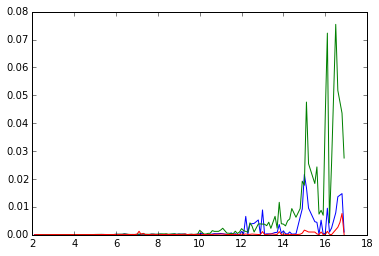

In [55]:
plotPoints(nodes010[0:120], 120, False)  # синий ошибка до 10%
plotPoints(nodes0[0:120], 120, False)   #зеленый без ошибки
plotPoints(nodes025[0:120], 120, False) #красный ошибка до 25%

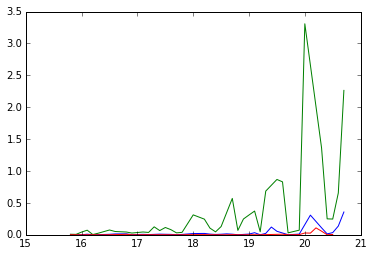

In [56]:
plotPoints(nodes010[110:150], 40, False)  # синий 
plotPoints(nodes0[110:150], 40, False)   #зеленый  
plotPoints(nodes025[110:150], 40, False) #красный

Видна зависимость между качеством апроксимации и временем работы программы.
Будет интересно посмотреть, например на зависимость времени работы программы на одном и том же тесте от качества решения задачи. Возьмем например размер задачи 26, чтобы не ждать два часа пока все посчитается точно. 

TypeError: show() missing 1 required positional argument: 'node'

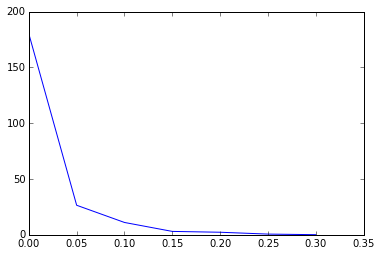

In [57]:
nodesOne.append(readNodes("26out05.txt")[0])
nodesOne.append(readNodes("26out1.txt")[0])
nodesOne.append(readNodes("26out15.txt")[0])
nodesOne.append(readNodes("26out20.txt")[0])
nodesOne.append(readNodes("26out25.txt")[0])
nodesOne.append(readNodes("26out30.txt")[0])
Y =  [nodesOne[i].getTime() for i in range(len(nodesOne))]
X =  [0.05 * i  for i in range(len(nodesOne))]
pylab.plot (X, Y)
show()

Видно, что время, а соотвественно и количество перебираемых случаев падает по экспоненте 
в зависимости от требуемой точности.